# Name Frequency of Green Mountain Cemetery compared to Nationwide SSA Data

#### John Sokol 
#### Intro to Data Science and Analytics 
#### 29 November 2017

## Introduction:

The name of an individual is arguably the most important intangible possession anyone can call their own in a lifetime. A name, both first name and surname, calls to mind a snapshot of the most important achievements an individual has accomplished, or to the same token, events or actions that have scarred his or her reputation for the worse. Regardless, a person's name is significant to the name holder, as they will carry this name for the duration of their life barring legal changes. 

The first name is especially noteworthy; although the mother and father of a newborn traditionally can not choose their child's surname, the first name is freely chosen by the newborn's parents. The choice is traditionally influenced by cultural/family history, religious meaning, and of course, gender. 

The question of this study is the following: What percentage of the top 5 most popular male and female first names are given to people who reside in Hammonton, New Jersey in the past century? In order to complete this analysis, the top 5 newborn first names between 1917 - 2016 will be cited from the Social Security Administration (SSA) website, an independent United States government agency that collects this data on a yearly basis. This government data will be cross referenced with 107 data values from Green Mountain cemetery on October 31, 2017, to observe if a top 5 frequency name collected in the cemetry dataset is also a top 5 frequency name in the government dataset. Gender specific histograms illustrating the frequency of the top 5 most popular newborn first names will provide a graphical representation of the results. 

The following two tables consist of data from the SSA to compare to the cemetery dataset:

In [61]:
ssa_male = pd.DataFrame({'Name': ['James','John','Robert','Michael','William'], 
'Number': [4815847,4636242,4600785,4307170,3689740]})

ssa_female = pd.DataFrame({'Name': ['Mary','Patricia','Jennifer',
'Elizabeth','Linda'], 
'Number': [3455228,1565291,1464890,1449478,1447946]})

In [50]:
ssa_male  # Table 1: Top 5 total male newborn first names from 1917 to 2016 [1]

,Name,Number
0,James,4815847
1,John,4636242
2,Robert,4600785
3,Michael,4307170
4,William,3689740


In [51]:
ssa_female # Table 2: Top 5 total female newborn first names from 1917 to 2016 [1]

,Name,Number
0,Mary,3455228
1,Patricia,1565291
2,Jennifer,1464890
3,Elizabeth,1449478
4,Linda,1447946


These 10 names are the names to looking for once we have a valid dataset to analyze. Now that the top 5 names of the past 100 years have been established, it is timet to import and munge our collected Green Mountain Cemetery Data.

## Importing Dataset and Data Analysis: 

In [56]:
import pandas as pd
master_cem = pd.read_csv('master_cem_data.csv',header = 3)
master_cem_data = master_cem.rename(columns = {'First Name': 'first_name',
'Date of Birth': 'DOB'})
master_cem_data.head()

,Observation,last_name,first_name,Gender,DOB,Date of Death,Age
0,1,Perricone,Angelina,Female,1897,1977,80
1,2,Mills,Richard,Male,1927,1987,60
2,3,Perricone,Louis,Male,1895,1956,61
3,4,Benjamin,Alexander,Male,1916,2004,88
4,5,Smith,Edgar,Male,1921,2000,79


Since the SSA dataset only provides data from 1917 - 2016, the people with a date of birth prior to 1917 can not be included in this study. 

In [57]:
master_cem_1917 = master_cem_data[master_cem_data.DOB >= 1917]
master_cem_1917.head()

,Observation,last_name,first_name,Gender,DOB,Date of Death,Age
1,2,Mills,Richard,Male,1927,1987,60
4,5,Smith,Edgar,Male,1921,2000,79
5,6,Helen,Alexander,Male,1921,1985,64
6,7,Smith,Viria,Female,1930,2012,82
7,8,Torres,John A.,Male,1931,1986,55


Let us see how many observations, or how many people with a date of birth < 1917, were removed. 

In [8]:
len(master_cem_data) # Dataset before < 1917 removal

330

In [40]:
len(master_cem_1917) # Dataset after < 1917 removal 

107

So 223 / 330, or approxiately 67.5% of the individuals recorded in the cemetery dataset were born before 1917. Although more data is preferable, 107 observations can be worked with.

Now lets observe the name frequency, male and female inclusive, to determine the top 5 most frequent names in our dataset per gender. 

In [42]:
master_cem_1917.first_name.value_counts().head(20)

Joseph           5
Robert           5
John             4
Helen            3
Catherine        3
Anthony          3
Richard          3
William          2
Gladys           2
Phillip          2
James            2
Josephine        2
Gennaro          2
Raymond          2
Sarah            2
Charles          2
Robert c. JR.    1
Alexander        1
Harriett P       1
Jeanie           1
Name: first_name, dtype: int64

From here, this data can be organized into two separate dictionaries with string and numerical keys to prepare for data visualization.

## Data Visualization:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

top_males = {'Robert': 5,'Joseph': 5, 'John': 4,'Anthony': 3,'Richard': 3}
top_females = {'Catherine': 3,'Helen': 3,'Gladys': 2,'Josephine': 2,'Sarah': 2}

top_males_index = {1: 5, 2: 5, 3: 4, 4: 3, 5: 3}
top_females_index = {1: 3, 2: 3, 3: 2, 4: 2, 5: 2}

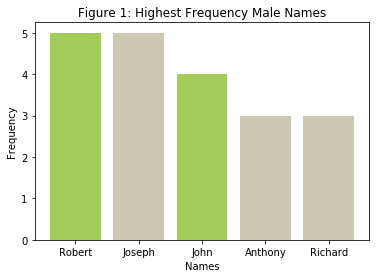

In [44]:
plt.bar(list(top_males_index.keys()),list(top_males_index.values()),
color = ['#A2CD5A','#CDC8B1','#A2CD5A','#CDC8B1','#CDC8B1'], 
tick_label = (top_males.keys()))
plt.title("Figure 1: Highest Frequency Male Names")
plt.ylabel('Frequency')
plt.xlabel('Names')
plt.show()

According to master_cem_1917 cross referenced with Table 1 (ssa_male), the only names to appear in the top 5 of both the Green Mountain and SSA dataset is 'Robert' and 'John'. With a dataset length of 107, the percentage of the dataset that have these two names is the following: 4.6% for 'Robert; and 3.7% for 'John'. 

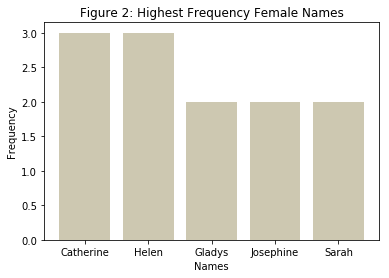

In [45]:
plt.bar(list(top_females_index.keys()),list(top_females_index.values()),
color = '#CDC8B1', tick_label = (top_females.keys()))
plt.title("Figure 2: Highest Frequency Female Names")
plt.ylabel('Frequency')
plt.xlabel('Names')
plt.show()

Using the same comparison method as the male data visualization, the top 5 female names of the Green Mountain dataset was compared to Table 2 (ssa_female). None of the top female names in the Green Mountain dataset were mentioned in the top 5 of the SSA dataset.  

It seems odd that the most frequent overall female name of the past century, 'Mary' did not make an appearance at all in the top 5 of the Green Mountain dataset. To investigate, the frequency of Mary for the entire dataset, including people born before 1917, is counted and juxtaposed with the frequency of 'Mary' for the years 1917 - present day: 

In [32]:
mary_count = 0
for i in master_cem_data['first_name']:
    if i == 'Mary':
        mary_count = mary_count + 1
print(mary_count) # frequency of 'Mary' from the entire dataset

7


In [47]:
mary_count_1917 = 0
for j in master_cem_1917['first_name']:
    if j == 'Mary':
        mary_count_1917 = mary_count_1917 + 1
print(mary_count_1917) # frequency of 'Mary' 1917 - present day

0


To put these values into context, the frequency observations for all of the names in the entire Green Mountain dataset should be observed: 

In [48]:
master_cem_data.first_name.value_counts().head(15)

John         13
Joseph       11
William       8
Anthony       7
Charles       7
Robert        7
Mary          7
Catherine     6
Anna          5
Frank         5
Richard       5
Josephine     5
Rose          5
Sarah         5
James         4
Name: first_name, dtype: int64

The name 'Mary' is one of the most frequent names in the entire Green Moutain dataset, yet none of the name observations are from 1917 - present day. So all 7 'Mary' names are from people born before 1917. This seeems contradictory to the data provided by the SSA, with 'Mary' being the top overall female name of the past century. 

## Conclusion: 
This brief analysis of a small sample of deceased inidivuals from the Green Mountain Cemetery in Hammonton, New Jersey, allows insight into the name frequency of the people of this quaint South Jersey town. After data visualization of the top 5 most frequent names (male and female) compared to the top 5 overall most frequent names of the past century (male and female, 1917 - 2016) the data indicates the following. For males, only the names 'Robert' and 'John' from the Green Mountain sample agree with Table 1. For females, no names agree with Table 2, which is particularly  noteworthy for the name 'Mary'. As a result, the name 'Mary' was further investigated; although 'Mary' was one of the most frequent names of the entire Green Mountain dataset inclusive of people born before 1917, 'Mary' did not appear once in the dataset for people only born after 1917. This finding seems to contradict the data from Table 2. However, for future study, a larger sample size should be take to obtain more accurate data. Specifically, a statistical analysis to determine the minimum sample size for a certain confidence level can be computed for further investigation. 

## References: 
[1]. Social Security. (n.d.). Retrieved November 29, 2017, from https://www.ssa.gov/oact/babynames/decades/century.html